In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

####  Q1 : Import the data and assign appropriate column names.

In [52]:
ds=pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',delim_whitespace=True,header=None)
ds.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [53]:
ds.columns=['City1','City2','Average Fare For Route','Distance','Average weekly passengers','market leading airline','market share',
            'Average fare','Low price airline','market share','price']

In [54]:
ds.head()

,City1,City2,Average Fare For Route,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


####  Q 2 : Drop the variables which has textual information (categorical variables)

In [55]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare For Route       1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share                 1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [56]:
ds.drop(['City1','City2','market leading airline','Low price airline'],axis=1,inplace=True)

In [16]:
ds.head()

,Average Fare For Route,Distance,Average weekly passengers,market share,Average fare,market share,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


####  Q 3 : Convert all the variable’s datatype to Integer 

In [57]:
ds=ds.astype(int)
ds.head()

,Average Fare For Route,Distance,Average weekly passengers,market share,Average fare,market share,price
0,114,528,424,70,111,70,111
1,122,860,276,75,123,17,118
2,214,852,215,78,223,2,167
3,69,288,606,96,68,96,68
4,158,723,313,39,161,15,145


In [58]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average Fare For Route       1000 non-null int32
Distance                     1000 non-null int32
Average weekly passengers    1000 non-null int32
market share                 1000 non-null int32
Average fare                 1000 non-null int32
market share                 1000 non-null int32
price                        1000 non-null int32
dtypes: int32(7)
memory usage: 27.4 KB


#### Q 4 : Remove all the outliers from the data using IQR method (Retain data points within 1.5 * IQR) 

In [59]:
ds.describe()

,Average Fare For Route,Distance,Average weekly passengers,market share,Average fare,market share,price
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,162.871000,1056.973000,671.804000,59.63000,166.150000,34.059000,142.711000
std,55.373157,643.203251,766.516661,19.35163,62.666136,27.084037,47.241584
min,50.000000,108.000000,181.000000,17.00000,50.000000,1.000000,49.000000
25%,125.000000,553.500000,256.750000,46.00000,124.000000,13.000000,113.000000
50%,161.000000,919.000000,404.000000,59.00000,161.000000,26.000000,137.000000
75%,197.000000,1452.500000,769.250000,73.00000,202.250000,52.000000,168.000000
max,401.000000,2724.000000,8950.000000,100.00000,490.000000,100.000000,387.000000


In [60]:
Q1=ds.quantile(0.25)
Q3=ds.quantile(0.75)
IQR=Q3-Q1
IQR

Average Fare For Route        72.00
Distance                     899.00
Average weekly passengers    512.50
market share                  27.00
Average fare                  78.25
market share                  39.00
price                         55.00
dtype: float64

In [61]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [62]:
ds1=ds[~((ds<lower_limit) | (ds>upper_limit)).any(axis=1)]

In [63]:
ds1.describe()

,Average Fare For Route,Distance,Average weekly passengers,market share,Average fare,market share,price
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,159.787571,1039.383051,498.654237,60.134463,162.084746,33.876836,139.943503
std,48.461699,615.224361,327.553060,19.347530,53.278028,27.167854,39.853822
min,50.000000,108.000000,181.000000,17.000000,50.000000,1.000000,50.000000
25%,126.000000,564.000000,249.000000,47.000000,125.000000,13.000000,115.000000
50%,160.000000,914.000000,372.000000,59.000000,160.000000,26.000000,138.000000
75%,194.000000,1381.000000,644.000000,74.000000,198.000000,52.000000,166.000000
max,288.000000,2724.000000,1519.000000,100.000000,315.000000,100.000000,250.000000


####  Q 5: Print the correlation matrix. 

In [64]:
ds1.corr()

,Average Fare For Route,Distance,Average weekly passengers,market share,Average fare,market share,price
Average Fare For Route,1.000000,0.522609,-0.197014,-0.207874,0.979620,-0.494021,0.840969
Distance,0.522609,1.000000,-0.129640,-0.547132,0.489541,-0.361448,0.539772
Average weekly passengers,-0.197014,-0.129640,1.000000,0.022685,-0.163634,0.076881,-0.208752
market share,-0.207874,-0.547132,0.022685,1.000000,-0.193264,0.280838,-0.314804
Average fare,0.979620,0.489541,-0.163634,-0.193264,1.000000,-0.519736,0.794175
market share,-0.494021,-0.361448,0.076881,0.280838,-0.519736,1.000000,-0.261183
price,0.840969,0.539772,-0.208752,-0.314804,0.794175,-0.261183,1.000000


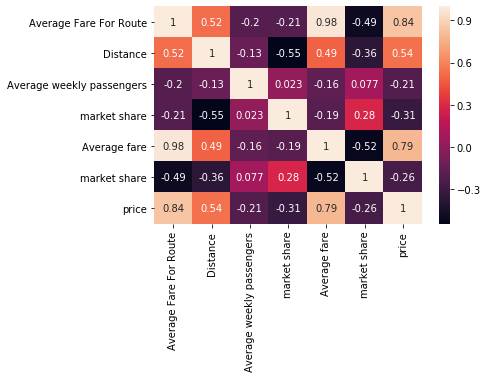

In [65]:
sns.heatmap(ds1.corr(),annot=True)
plt.show()

####  Q 6 : Treat “Average Fare” –  as your Dependent Variable and the variable which has the highest correlation with Average Fare as the Independent Variable.Drop all the other variables .

In [66]:
ds1.drop(['Distance','Average weekly passengers','market share','market share','price'],axis=1,inplace=True)

In [67]:
ds1.head()

,Average Fare For Route,Average fare
0,114,111
1,122,123
2,214,223
3,69,68
4,158,161


#### Q 7 : Create Scatter Plot of Independent Variable Vs Dependent Variable.

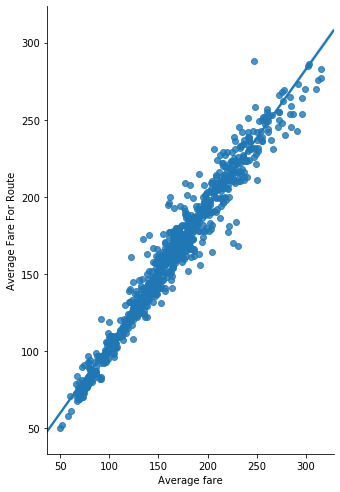

In [69]:
sns.pairplot(ds1,x_vars=['Average fare'], y_vars='Average Fare For Route', height=7, aspect=0.7,kind='reg')
plt.show()

####  Q 8 : Divide the data set into training and test data set and build a Linear Regression model. 

In [73]:
X = ds1.drop(columns="Average Fare For Route")
y = ds1["Average Fare For Route"]

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_pred = regressor.predict(X_train)

####  Q 9 :Print the train and test accuracy of the model .

In [79]:
print("R^2:",regressor.score(X_train, y_train))

R^2: 0.9591969883629508


In [80]:
y_pred_test = regressor.predict(X_test)

In [81]:
print("R^2:",regressor.score(X_test, y_test))

R^2: 0.9606177646181092


In [ ]:
Q 10 :Print the coefficient and the intercept of the model .

In [82]:
regressor.intercept_

14.798144021471245

In [83]:
regressor.coef_ 

array([0.89332115])